# MOVIE RECOMMENDATION SYSTEM WITH MOVIELENS DATA BASED ON USER RATINGS

## 1. BUSINESS UNDERSTANDING 



### Objective

Leveraging the MovieLens dataset is to develop a robust movie recommendation system that enhances user engagement and satisfaction within our online movie streaming platform. By effectively recommending movies that align with users' preferences, we aim to increase user retention, drive user-generated content, and boost overall revenue.

### Data Description 

The MovieLens dataset, curated by the GroupLens research lab at the University of Minnesota, is a well-established and widely used resource in the field of recommendation systems. It contains a wealth of information, including user ratings, movie metadata, and user profiles, collected over a significant period of time.

### Problem Definition 

Our primary business problem is to overcome the challenge of content discovery for users. With an ever-expanding catalog of movies, users often face decision making issues when choosing what to watch. We need to address this by providing tailored movie recommendations based on user preferences, thereby simplifying the selection process and improving user satisfaction.

### Key Stakeholders

#### Users: 
Our end-users are at the core of our business. We aim to provide them with an enjoyable and personalized movie-watching experience.
#### Platform Owners: 
The success of our recommendation system directly impacts platform owners (MovieLens) by increasing user engagement and revenue.
#### Content Providers:
Enhanced user engagement can attract content providers to collaborate with the platform, enriching their movie catalog.
#### Data Scientists and Engineers: 
The data science and engineering teams play a crucial role in developing, deploying, and maintaining the recommendation system.

### Solution Approach

Our approach is centered around collaborative filtering, a proven recommendation technique. We will analyze user behavior and preferences within the dataset to build models that identify similarities between users and movies. This will enable us to provide personalized movie recommendations.

### Evaluation Metrics

To assess the effectiveness of our recommendation system, we will employ metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Precision, Recall, F1-score, Coverage, and Diversity. These metrics will help us quantify the system's performance in terms of accuracy and relevance.

### Research Questions?

1. What movies might I enjoy watching?
    Users can receive personalized movie recommendations based on their past viewing and rating history.

2. What are the most popular or highly-rated movies?
    The system can provide lists of top-rated or trending movies, helping users discover popular titles.

3. Are there movies similar to the ones I've enjoyed in the past?
    Users can receive recommendations for movies similar to those they've rated highly, expanding their viewing options.

4. How can I discover new movies from genres I like?
    The system can suggest movies from specific genres that align with a user's preferences.

5. What movies have received critical acclaim or awards?
    Users can access recommendations for award-winning or critically acclaimed films.

6. What are the top recommendations for a specific user, given their unique tastes?
    The system tailors recommendations for individual users based on their historical ratings and preferences.

7. How can we improve user engagement and retention on our platform?
    For businesses, the recommendation system can increase user engagement by providing relevant content, reducing churn, and increasing user satisfaction.

8. What is the diversity and coverage of our recommendations?
    Businesses can assess the diversity of recommendations to ensure users are exposed to a wide range of movie genres and styles. Additionally, they can measure how many unique movies in their catalog are being recommended.

9. How accurate are our recommendations?
    Businesses can evaluate the effectiveness of the recommendation system using metrics such as RMSE, MAE, or precision-recall, determining how closely the system's predictions align with user preferences.

10. How can we increase revenue through movie recommendations?
    Businesses can leverage the recommendation system to drive movie rentals, subscriptions, or sales, thereby increasing revenue and ROI.

11. How can we personalize the user experience and increase user-generated content?
    By offering tailored recommendations, businesses can encourage users to rate and review movies, contributing to a richer database of user-generated content.

### Success Criteria

The success of our recommendation system will be measured by improvements in key performance indicators (KPIs) including:

1. User Engagement: Increased user engagement through higher interaction with recommended movies.
2. User Retention: A decrease in user churn rates, indicating improved user satisfaction.
3. Revenue: A significant boost in revenue through increased user subscriptions and movie rentals.
4. Content Utilization: A broader range of movies being watched, leading to better utilization of the movie catalog.

## 2. DATA UNDERSTANDING

- The dataset is named "ml-latest-small" and is from MovieLens, a movie recommendation service.
- It includes 100,836 ratings and 3,683 tag applications across 9,742 movies.
- The data was generated by 610 users between March 29, 1996, and September 24, 2018.
- The dataset was last generated on September 26, 2018.
- Users were selected at random, and their demographic information is not included.

Movie file :
1. movieId - movie reference indicator
2. title - this is the movie titles
3. genres - movie types

Rating file :
1. userId - users reference indicator
2. movieId 
3. rating - movie rating 
4. timestamp - movie online information 

## 3. IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import Dataset, Reader
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise import KNNBaseline
import random 
import scipy.stats as stats

## 4. READING DATA 

Start by opening the data preferably by using the ratings and movies data

In [4]:
# Load the ratings data
ratings = pd.read_csv("C:\\Users\\Administrator\\Desktop\\Moringa\\Phase 4\\Phase 4 Project Recommendation System\\ml-latest-small\\ml-latest-small\\ratings.csv")
# Load the movies data 
movies = pd.read_csv("C:\\Users\\Administrator\\Desktop\\Moringa\\Phase 4\\Phase 4 Project Recommendation System\\ml-latest-small\\ml-latest-small\\movies.csv")

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Check for missing data on the dataset

In [7]:
print("Ratings Data - Missing Values:")
print(ratings.isnull().sum())

print("\nMovies Data - Missing Values:")
print(movies.isnull().sum())

Ratings Data - Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Movies Data - Missing Values:
movieId    0
title      0
genres     0
dtype: int64


From the illustration above there are no missing values in the Ratings and Movies data

Check for duplicates 

In [8]:
ratings.drop_duplicates(inplace=True)
# outlier handling: Identifying and capping outlier ratings
outlier_threshold = 5.0
ratings['rating'] = ratings['rating'].clip(0.5, outlier_threshold)

In [9]:
# Check data consistency: Ensure that movie IDs are consistent across datasets
if movies['movieId'].isin(ratings['movieId']).all():
    print("Inconsistent movie IDs between movies and ratings datasets.")
else:
    print("Consistent movie IDs between movies and ratings datasets. ")

Consistent movie IDs between movies and ratings datasets. 


In [10]:
ratings.drop(columns=['timestamp'], inplace=True)
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


### Feature Engineering

In [11]:
# Calculate the average rating for each movie
average_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
average_ratings.rename(columns={'rating': 'avg_rating'}, inplace=True)

In [12]:
# Assuming genres are in the "genres" column and are pipe-separated
unique_genres = set('|'.join(movies['genres']).split('|'))
for genre in unique_genres:
    movies[genre] = movies['genres'].apply(lambda x: 1 if genre in x else 0)

In [13]:
# Display the first few rows of the resulting DataFrame
print("Average Ratings for Movies:")
print(average_ratings.head())

print("\nMovies DataFrame with Genre-Based Features:")
print(movies.head())

Average Ratings for Movies:
   movieId  avg_rating
0        1    3.920930
1        2    3.431818
2        3    3.259615
3        4    2.357143
4        5    3.071429

Movies DataFrame with Genre-Based Features:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  Adventure  Drama  Children  \
0  Adventure|Animation|Children|Comedy|Fantasy          1      0         1   
1                   Adventure|Children|Fantasy          1      0         1   
2                               Comedy|Romance          0      0         0   
3                         Comedy|Drama|Romance          0      1         0   
4                                       Comedy          0      0         0   

   Romance  Action 

Create a feature that counts the number of ratings each movie has received. Movies with a higher number of ratings may be more popular or well-known.

In [14]:
# Calculate the number of ratings for each movie
movie_rating_counts = ratings['movieId'].value_counts().reset_index()
movie_rating_counts.columns = ['movieId', 'num_ratings']

# Display the first few rows of the resulting DataFrame
print("Number of Ratings for Each Movie:")
print(movie_rating_counts.head())

Number of Ratings for Each Movie:
   movieId  num_ratings
0      356          329
1      318          317
2      296          307
3      593          279
4     2571          278


Genre Based:

Create binary columns for each genre (e.g., Action, Comedy, Romance) and indicate whether a movie belongs to a particular genre. These binary indicators can be used in content-based filtering.
Calculate the proportion of each genre in a movie's genre list (e.g., the percentage of Action movies).

In [15]:
# Extract unique genres
unique_genres = set('|'.join(movies['genres']).split('|'))

# Create binary genre-based columns
for genre in unique_genres:
    movies[genre] = movies['genres'].apply(lambda x: 1 if genre in x else 0)

# Calculate the proportion of each genre in a movie's genre list
genre_columns = list(unique_genres)
movies[genre_columns] = movies[genre_columns].div(movies[genre_columns].sum(axis=1), axis=0)

# Display the first few rows of the resulting DataFrame
print("Movies DataFrame with Binary Genre-Based Columns:")
print(movies.head())

Movies DataFrame with Binary Genre-Based Columns:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  Adventure     Drama  Children  \
0  Adventure|Animation|Children|Comedy|Fantasy   0.200000  0.000000  0.200000   
1                   Adventure|Children|Fantasy   0.333333  0.000000  0.333333   
2                               Comedy|Romance   0.000000  0.000000  0.000000   
3                         Comedy|Drama|Romance   0.000000  0.333333  0.000000   
4                                       Comedy   0.000000  0.000000  0.000000   

    Romance  Action  Mystery  Horror  ...  (no genres listed)  Animation  \
0  0.000000     0.0      0.0     0.0  ...                 0.0        0.2   
1  0.00000

Release Year:

Extract the release year from movie titles and create a feature for the movie's release year. This can be used to recommend recent movies or movies from a specific era.

In [16]:
# Assuming that the release year is enclosed in parentheses at the end of the title
movies['release_year'] = movies['title'].str.extract(r'\((\d{4})\)')

# Display the first few rows of the resulting DataFrame
print("Movies DataFrame with Release Year:")
print(movies.head())

Movies DataFrame with Release Year:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  Adventure     Drama  Children  \
0  Adventure|Animation|Children|Comedy|Fantasy   0.200000  0.000000  0.200000   
1                   Adventure|Children|Fantasy   0.333333  0.000000  0.333333   
2                               Comedy|Romance   0.000000  0.000000  0.000000   
3                         Comedy|Drama|Romance   0.000000  0.333333  0.000000   
4                                       Comedy   0.000000  0.000000  0.000000   

    Romance  Action  Mystery  Horror  ...  Animation  Documentary  War  \
0  0.000000     0.0      0.0     0.0  ...        0.2          0.0  0.0   
1  0.000000     0.0      0.0

User-Based Features:

For collaborative filtering, you can create user-based features such as the average rating given by each user or the number of movies each user has rated.

In [17]:
# Calculate the average rating given by each user
user_avg_rating = ratings.groupby('userId')['rating'].mean().reset_index()
user_avg_rating.rename(columns={'rating': 'avg_rating_by_user'}, inplace=True)

# Calculate the number of movies each user has rated
user_rating_counts = ratings['userId'].value_counts().reset_index()
user_rating_counts.columns = ['userId', 'num_movies_rated']

# Display the first few rows of the resulting DataFrames
print("Average Rating Given by Each User:")
print(user_avg_rating.head())

print("\nNumber of Movies Rated by Each User:")
print(user_rating_counts.head())

Average Rating Given by Each User:
   userId  avg_rating_by_user
0       1            4.366379
1       2            3.948276
2       3            2.435897
3       4            3.555556
4       5            3.636364

Number of Movies Rated by Each User:
   userId  num_movies_rated
0     414              2698
1     599              2478
2     474              2108
3     448              1864
4     274              1346


## 5. MODELLING USING COLLABORATIVE FILTERING

Generate latent factors or embeddings for movies and users using matrix factorization techniques like Singular Value Decomposition (SVD) or matrix factorization models. These embeddings can be used to capture complex relationships.

Also by training the SVD Model set and fit the model 

In [18]:
# Define the Reader object
reader = Reader(rating_scale=(0.5, 5.0))  # Define your rating scale as appropriate
 MODELLING USING COLLABORATIVE FILTERING
Generate latent factors or embeddings for movies and users using matrix factorization techniques like Singular Value Decomposition (SVD) or matrix factorization models. These embeddings can be used to capture complex relationships.

Also by training the SVD Model set and fit the model

# Define the Reader object
reader = Reader(rating_scale=(0.5, 5.0))  # Define your rating scale as appropriate
​
# Load the ratings data using the Reader
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
​
# Split the dataset into a trainset and testset
trainset, testset = train_test_s
# Load the ratings data using the Reader
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split the dataset into a trainset and testset
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Create and train an SVD model
svd_model = SVD(n_factors=50, random_state=42)
svd_model.fit(trainset)

# Make predictions on the test set
predictions = svd_model.test(testset)

# Evaluate the model using RMSE
rmse = accuracy.rmse(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Get latent factors for movies and users
movie_factors = svd_model.qi
user_factors = svd_model.pu

RMSE: 0.8775
Root Mean Squared Error (RMSE): 0.8774680781839199


 RMSE value of 0.8775 indicates the average error (or the average difference) between the predicted ratings by the recommendation system and the actual ratings given by users. Lower RMSE values indicate better accuracy, while higher values suggest that the predictions are less accurate.

Lets make a simple prediction to see the outcome.

In [19]:
# Predict the rating for user 1 and movie 100
predicted_rating = svd_model.predict(1, 100)

# Extract the predicted rating value
predicted_rating_value = predicted_rating.est

print(f"Predicted rating for user 1 and movie 100: {predicted_rating_value}")

Predicted rating for user 1 and movie 100: 3.661648275505914


to determine the best model.Compare the different models and see which ones perform best. For consistency sake, use RMSE to evaluate models. Can it get a model with a higher average RMSE on test data than 0.877?

In [20]:
# Define the parameter grid for SVD
param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30, 40],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.04, 0.06]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1, joblib_verbose=5)

# Fit the grid search on the data
grid_search.fit(data)

# Get the best RMSE score and corresponding parameters
best_rmse = grid_search.best_score['rmse']
best_params = grid_search.best_params['rmse']

print(f"Best RMSE: {best_rmse}")
print(f"Best Parameters: {best_params}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min


Best RMSE: 0.8620066984251374
Best Parameters: {'n_factors': 150, 'n_epochs': 40, 'lr_all': 0.01, 'reg_all': 0.06}


[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  4.2min finished


It is going to apply KNN basic model to evaluate

In [21]:
# Define the KNNBasic model
knn_basic_model = KNNBasic(sim_options={'user_based': True})

# Perform cross-validation
results = cross_validate(knn_basic_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Extract and print the average RMSE and MAE scores
average_rmse = results['test_rmse'].mean()
average_mae = results['test_mae'].mean()

print(f"Average RMSE: {average_rmse}")
print(f"Average MAE: {average_mae}")

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9453  0.9564  0.9498  0.9472  0.9386  0.9475  0.0058  
MAE (testset)     0.7252  0.7332  0.7269  0.7262  0.7186  0.7260  0.0047  
Fit time          0.44    0.48    0.46    0.46    0.54    0.48    0.03    
Test time         3.25    3.61    3.34    3.25    4.21    3.53    0.36    
Average RMSE: 0.94745940740342
Average MAE: 0.7260214767131149


Lower RMSE(Root Mean Squared Error) and MAE (Mean Absolute Error) values are desirable because they indicate that the model's predictions are closer to the actual ratings. 

Lets use the KNNBaseline model

In [22]:
# Define the KNNBaseline model
knn_baseline_model = KNNBaseline(sim_options={'user_based': True})

# Perform cross-validation
results = cross_validate(knn_baseline_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Extract and print the average RMSE and MAE scores
average_rmse = results['test_rmse'].mean()
average_mae = results['test_mae'].mean()

print(f"Average RMSE: {average_rmse}")
print(f"Average MAE: {average_mae}")

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8693  0.8783  0.8746  0.8735  0.8739  0.8739  0.0029  
MAE (testset)     0.6660  0.6685  0.6662  0.6695  0.6693  0.6679  0.0015  
Fit time          0.96    1.07    0.98    0.95    0.97    0.99    0.04    
Test time         4.52    4.15    4.23    4.42    4.13    4.29    0.15    
Average RMSE: 0.8739218321113071
Average MA

It appears to have lower RMSE and MAE compared to the KNNBasic model, suggesting better accuracy. The fit time and test time measurements give you an idea of the computational efficiency of the model.

### Testing the models with Random data 

we have working models and everything, but wouldn't it be nice to get to recommendations specifically tailored to your preferences? That's what we'll be doing now. The first step is to create a function that allows us to pick randomly selected movies. The function should present users with a movie and ask them to rate it. If they have not seen the movie, they should be able to skip rating it.

In [23]:
def movie_rater(movie_df, num, genre=None):
    """
    Rate randomly selected movies and return a list of ratings in the format of {'userId': int, 'movieId': int, 'rating': float}.

    Parameters:
    - movie_df: DataFrame - DataFrame containing movie ids, movie names, and genres.
    - num: int - Number of ratings to collect from the user.
    - genre: str (optional) - Specify a genre to filter movies. If None, all movies will be considered.

    Returns:
    - rating_list: list - A list of dictionaries with user ratings.
    """
    rating_list = []
    user_id = 9999  # Assign a unique user ID for the user (you can adjust this as needed)

    # Filter movies by genre if specified
    if genre:
        movie_subset = movie_df[movie_df['genres'].str.contains(genre, case=False, na=False)]
    else:
        movie_subset = movie_df

    # Randomly select movies for rating
    random_movies = random.sample(range(len(movie_subset)), num)

    for idx in random_movies:
        movie = movie_subset.iloc[idx]
        movie_id = movie['movieId']
        movie_title = movie['title']

        # Prompt the user for a rating (0.5 to 5.0) or skip (None)
        rating = None
        while rating is None:
            try:
                rating = float(input(f"Rate '{movie_title}' (Movie ID: {movie_id}): "))
                if rating < 0.5 or rating > 5.0:
                    print("Please enter a rating between 0.5 and 5.0.")
                    rating = None
            except ValueError:
                print("Invalid input. Please enter a valid rating or 'skip'.")

        # Add the user rating to the list
        rating_dict = {'userId': user_id, 'movieId': movie_id, 'rating': rating}
        rating_list.append(rating_dict)

    return rating_list


In [24]:
new_ratings = movie_rater(movies, num=5, genre="Action")

# Display the collected ratings
print("User Ratings:")
print(new_ratings)

Rate 'Kung Fu Panda 3 (2016)' (Movie ID: 149406): 4.5
Rate 'Red 2 (2013)' (Movie ID: 103810): 3
Rate 'Westworld (1973)' (Movie ID: 2527): 3
Rate 'Terminator Salvation (2009)' (Movie ID: 68791): 5
Rate 'Avalanche (1978)' (Movie ID: 2534): 4
User Ratings:
[{'userId': 9999, 'movieId': 149406, 'rating': 4.5}, {'userId': 9999, 'movieId': 103810, 'rating': 3.0}, {'userId': 9999, 'movieId': 2527, 'rating': 3.0}, {'userId': 9999, 'movieId': 68791, 'rating': 5.0}, {'userId': 9999, 'movieId': 2534, 'rating': 4.0}]


In [25]:
# Assuming new_ratings is a list of dictionaries
new_ratings_df = pd.DataFrame(new_ratings)

# Check the format of new_ratings_df
print(new_ratings_df.head())

   userId  movieId  rating
0    9999   149406     4.5
1    9999   103810     3.0
2    9999     2527     3.0
3    9999    68791     5.0
4    9999     2534     4.0


In [26]:
ratings = pd.DataFrame(ratings)

# Assuming new_ratings is a list of dictionaries
new_ratings = pd.DataFrame(new_ratings)

In [27]:
updated_ratings = pd.concat([ratings, new_ratings], ignore_index=True)


In [28]:
# Create a Reader object to specify the rating scale
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are on a scale from 1 to 5

# Load the dataset from the DataFrame using the Reader
data = Dataset.load_from_df(updated_ratings[['userId', 'movieId', 'rating']], reader)

### Making predicitions with the new ratings

In [29]:
# Use the best parameters obtained from grid search (replace with your actual best parameters)
best_svd_params = {'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}

# Initialize the SVD model with the best parameters
svd_model = SVD(n_factors=50, random_state=42)

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(updated_ratings[['userId', 'movieId', 'rating']], reader)

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the SVD model on the training set
svd_model.fit(trainset)

# Make predictions on the test set
predictions = svd_model.test(testset)

# Calculate and print RMSE (Root Mean Squared Error) to evaluate the model's performance
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

RMSE: 0.8740
RMSE: 0.8740327183540942


In [30]:
#user example to use for this test
user_id = 9999

# Get a list of all movieIds in your dataset
all_movie_ids = ratings['movieId'].unique()

# Initialize an empty list to store movie recommendations in the format (movie_id, predicted_score)
user_recommendations = []

# Generate predictions for the selected user
for movie_id in all_movie_ids:
    # Predict the user's rating for this movie using your trained SVD model
    predicted_rating = svd_model.predict(user_id, movie_id).est
    
    # Append the movie_id and predicted_score to the recommendations list
    user_recommendations.append((movie_id, predicted_rating))

# Sort the recommendations by predicted_score in descending order
user_recommendations.sort(key=lambda x: x[1], reverse=True)

# Display the top N movie recommendations (e.g., top 10)
top_n_recommendations = user_recommendations[:10]
for i, (movie_id, predicted_score) in enumerate(top_n_recommendations, start=1):
    print(f"Recommendation {i}: Movie ID {movie_id}, Predicted Score {predicted_score}")

Recommendation 1: Movie ID 3275, Predicted Score 4.550401373988577
Recommendation 2: Movie ID 904, Predicted Score 4.53062511708242
Recommendation 3: Movie ID 2571, Predicted Score 4.505892501714833
Recommendation 4: Movie ID 1225, Predicted Score 4.485855850740438
Recommendation 5: Movie ID 750, Predicted Score 4.4777165421200325
Recommendation 6: Movie ID 1258, Predicted Score 4.465048653558773
Recommendation 7: Movie ID 4993, Predicted Score 4.458047731756855
Recommendation 8: Movie ID 1213, Predicted Score 4.455994381424309
Recommendation 9: Movie ID 1204, Predicted Score 4.45014467396145
Recommendation 10: Movie ID 58559, Predicted Score 4.442922559361759


In [31]:
def recommended_movies(user_id, svd_model, num_recommendations=10):
    """
    Get movie recommendations for a given user using the trained SVD model.

    Parameters:
    - user_id: int - The ID of the user for whom you want to generate recommendations.
    - svd_model: SVD - The trained SVD model.
    - num_recommendations: int (optional) - The number of movie recommendations to generate. Default is 10.

    Returns:
    - recommendations: list - A list of tuples containing movie ID and predicted score.
    """
    # Get a list of all movieIds in your dataset
    all_movie_ids = ratings['movieId'].unique()

    # Initialize an empty list to store movie recommendations in the format (movie_id, predicted_score)
    user_recommendations = []

    # Generate predictions for the selected user
    for movie_id in all_movie_ids:
        # Predict the user's rating for this movie using your trained SVD model
        predicted_rating = svd_model.predict(user_id, movie_id).est

        # Append the movie_id and predicted_score to the recommendations list
        user_recommendations.append((movie_id, predicted_rating))

    # Sort the recommendations by predicted_score in descending order
    user_recommendations.sort(key=lambda x: x[1], reverse=True)

    # Return the top N movie recommendations
    return user_recommendations[:num_recommendations]

# Example of how to use the recommended_movies() function
user_id = 9999  # Replace with the user ID for whom you want recommendations
num_recommendations = 10  # Adjust the number of recommendations as needed

recommendations = recommended_movies(user_id, svd_model, num_recommendations)

# Display the top N movie recommendations
for i, (movie_id, predicted_score) in enumerate(recommendations, start=1):
    print(f"Recommendation {i}: Movie ID {movie_id}, Predicted Score {predicted_score}")


Recommendation 1: Movie ID 3275, Predicted Score 4.550401373988577
Recommendation 2: Movie ID 904, Predicted Score 4.53062511708242
Recommendation 3: Movie ID 2571, Predicted Score 4.505892501714833
Recommendation 4: Movie ID 1225, Predicted Score 4.485855850740438
Recommendation 5: Movie ID 750, Predicted Score 4.4777165421200325
Recommendation 6: Movie ID 1258, Predicted Score 4.465048653558773
Recommendation 7: Movie ID 4993, Predicted Score 4.458047731756855
Recommendation 8: Movie ID 1213, Predicted Score 4.455994381424309
Recommendation 9: Movie ID 1204, Predicted Score 4.45014467396145
Recommendation 10: Movie ID 58559, Predicted Score 4.442922559361759


lets find a suggestion for the users so we can recommend them.

In [32]:
# Example of how to use the recommended_movies() function
user_id = 9999  # Replace with the user ID for whom you want recommendations
num_recommendations = 10  # Adjust the number of recommendations as needed

recommendations = recommended_movies(user_id, svd_model, num_recommendations)

# Display the top N movie recommendations with their titles
for i, (movie_id, predicted_score) in enumerate(recommendations, start=1):
    # Find the movie title corresponding to the movie ID
    movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
    print(f"Recommendation {i}: Movie Title: {movie_title}, Movie ID {movie_id}, Predicted Score {predicted_score}")


Recommendation 1: Movie Title: Boondock Saints, The (2000), Movie ID 3275, Predicted Score 4.550401373988577
Recommendation 2: Movie Title: Rear Window (1954), Movie ID 904, Predicted Score 4.53062511708242
Recommendation 3: Movie Title: Matrix, The (1999), Movie ID 2571, Predicted Score 4.505892501714833
Recommendation 4: Movie Title: Amadeus (1984), Movie ID 1225, Predicted Score 4.485855850740438
Recommendation 5: Movie Title: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Movie ID 750, Predicted Score 4.4777165421200325
Recommendation 6: Movie Title: Shining, The (1980), Movie ID 1258, Predicted Score 4.465048653558773
Recommendation 7: Movie Title: Lord of the Rings: The Fellowship of the Ring, The (2001), Movie ID 4993, Predicted Score 4.458047731756855
Recommendation 8: Movie Title: Goodfellas (1990), Movie ID 1213, Predicted Score 4.455994381424309
Recommendation 9: Movie Title: Lawrence of Arabia (1962), Movie ID 1204, Predicted Score 4.4501446739

Chain all of the steps together into one function that asks users for ratings for a certain number of movies, then all of the above steps are performed to return the top  𝑛 recommendations

In [34]:
def movie_recommender(movie_df, ratings_df, user_id, num_ratings, genre=None, num_recommendations=10):
    """
    Build a movie recommender system that collects user ratings and provides movie recommendations.

    Parameters:
    - movie_df: DataFrame - DataFrame containing movie ids, movie names, and genres.
    - ratings_df: DataFrame - DataFrame containing user ratings.
    - user_id: int - The ID of the user for whom recommendations are generated.
    - num_ratings: int - Number of movies to collect ratings for from the user.
    - genre: str (optional) - Specify a genre to filter movies. If None, all movies will be considered.
    - num_recommendations: int (optional) - Number of movie recommendations to generate. Default is 10.

    Returns:
    - recommendations: list - A list of tuples containing movie ID, title, and predicted score.
    """

    # Create a reader object to specify the rating scale
    reader = Reader(rating_scale=(1, 5))  # Assuming ratings are on a scale from 1 to 5

    # Load the dataset from the DataFrame using the Reader
    data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

    # Initialize the SVD model (you can use your best parameters here)
    svd_model = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02, random_state=42)

    # Split the dataset into training and testing sets
    trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

    # Train the SVD model on the training set
    svd_model.fit(trainset)

    # Collect user ratings for movies
    def collect_user_ratings(movie_df, num_ratings, genre):
        user_ratings = []
        for _ in range(num_ratings):
            if genre:
                # Filter movies by genre if specified
                movie_subset = movie_df[movie_df['genres'].str.contains(genre, case=False, na=False)]
            else:
                movie_subset = movie_df

            # Randomly select a movie for rating
            random_movie = random.choice(movie_subset['movieId'].values)
            movie_title = movie_df[movie_df['movieId'] == random_movie]['title'].values[0]

            rating = None
            while rating is None:
                try:
                    rating = float(input(f"Rate '{movie_title}' (Movie ID: {random_movie}): "))
                    if rating < 0.5 or rating > 5.0:
                        print("Please enter a rating between 0.5 and 5.0.")
                        rating = None
                except ValueError:
                    print("Invalid input. Please enter a valid rating between 0.5 and 5.0.")

            user_ratings.append({'userId': user_id, 'movieId': random_movie, 'rating': rating})

        return user_ratings

    user_ratings = collect_user_ratings(movie_df, num_ratings, genre)

    # Update the ratings DataFrame with user's new ratings
    ratings_df = pd.concat([ratings_df, pd.DataFrame(user_ratings)], ignore_index=True)

    # Generate movie recommendations for the user
    def generate_recommendations(user_id, svd_model, num_recommendations):
        all_movie_ids = ratings_df['movieId'].unique()
        user_recommendations = []

        for movie_id in all_movie_ids:
            predicted_rating = svd_model.predict(user_id, movie_id).est
            user_recommendations.append((movie_id, predicted_rating))

        user_recommendations.sort(key=lambda x: x[1], reverse=True)
        return user_recommendations[:num_recommendations]

    recommendations = generate_recommendations(user_id, svd_model, num_recommendations)

    # Get movie titles for recommendations
    def get_movie_titles(movie_df, recommendations):
        movie_titles = []
        for movie_id, predicted_score in recommendations:
            movie_title = movie_df[movie_df['movieId'] == movie_id]['title'].values[0]
            movie_titles.append((movie_id, movie_title, predicted_score))
        return movie_titles

    recommended_movies = get_movie_titles(movie_df, recommendations)

    return recommended_movies

# Example usage:
user_id = 9999
num_ratings = 5
genre = "Action"
num_recommendations = 10

recommended_movies = movie_recommender(movies, ratings, user_id, num_ratings, genre, num_recommendations)

# Display recommended movies with titles and predicted scores
for i, (movie_id, movie_title, predicted_score) in enumerate(recommended_movies, start=1):
    print(f"Recommendation {i}: Movie Title: {movie_title}, Movie ID {movie_id}, Predicted Score {predicted_score}")


Rate 'G.I. Joe: The Rise of Cobra (2009)' (Movie ID: 70336): 4
Rate ''Hellboy': The Seeds of Creation (2004)' (Movie ID: 97757): 4
Rate 'Safe House (2012)' (Movie ID: 92507): 3.5
Rate 'Pusher II: With Blood on My Hands (2004)' (Movie ID: 34811): 2
Rate 'Valhalla Rising (2009)' (Movie ID: 77201): 2
Recommendation 1: Movie Title: Lawrence of Arabia (1962), Movie ID 1204, Predicted Score 4.395384420121368
Recommendation 2: Movie Title: Shawshank Redemption, The (1994), Movie ID 318, Predicted Score 4.369144219436437
Recommendation 3: Movie Title: Rear Window (1954), Movie ID 904, Predicted Score 4.3551841714402855
Recommendation 4: Movie Title: Usual Suspects, The (1995), Movie ID 50, Predicted Score 4.313740937066033
Recommendation 5: Movie Title: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Movie ID 750, Predicted Score 4.310995549380883
Recommendation 6: Movie Title: Cinema Paradiso (Nuovo cinema Paradiso) (1989), Movie ID 1172, Predicted Score 4.2923979

This function collects user ratings, updates the ratings DataFrame, and generates movie recommendations based on the user's ratings and specified genre. It then displays the recommended movies along with their titles and predicted scores.

## 6. ANALYSIS 

### A/B Testing for the system 

In [35]:
control_group_ctr = np.random.normal(0.1, 0.02, 1000)  # Control group (existing system)
treatment_group_ctr = np.random.normal(0.12, 0.02, 1000)  # Treatment group (new system)

# Function to simulate user interactions
def simulate_user_interactions(ctr):
    return [1 if random.random() < c else 0 for c in ctr]

# Simulate user interactions for both groups
control_group_clicks = simulate_user_interactions(control_group_ctr)
treatment_group_clicks = simulate_user_interactions(treatment_group_ctr)

# Calculate CTR for each group
control_group_ctr = sum(control_group_clicks) / len(control_group_clicks)
treatment_group_ctr = sum(treatment_group_clicks) / len(treatment_group_clicks)

# Perform a statistical test (e.g., t-test) to determine if the difference is significant
from scipy import stats

# Assuming normally distributed data and equal variance (you may need to adapt this based on your data)
t_stat, p_value = stats.ttest_ind(control_group_clicks, treatment_group_clicks)

# Define significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The difference in CTR between the groups is statistically significant.")
else:
    print("There is no statistically significant difference in CTR between the groups.")

# Display the CTR for both groups
print("Control Group CTR:", control_group_ctr)
print("Treatment Group CTR:", treatment_group_ctr)


There is no statistically significant difference in CTR between the groups.
Control Group CTR: 0.092
Treatment Group CTR: 0.11


We simulate click-through rates (CTR) for two groups: the control group (existing system) and the treatment group (new system).
We simulate user interactions based on the CTR values.
We calculate the actual CTR for both groups.
We perform a two-sample t-test to determine if the difference in CTR between the groups is statistically significant.
Please note that this is a simplified example for demonstration purposes. Npormally, you would replace the simulated data with actual user interaction data from your recommender system. Additionally, consider factors like sample size, statistical assumptions, and appropriate significance levels when conducting A/B tests. This is to guide us to know if we can use it in any other system with different data

### Random Data A/B Testing 

In [36]:
# data for A/B testing
np.random.seed(0)
group_a = np.random.normal(loc=50, scale=10, size=1000)  # Control group
group_b = np.random.normal(loc=55, scale=10, size=1000)  # Experimental group

# Define your KPI (e.g., conversion rate, revenue, user engagement)
def calculate_kpi(data):
    # Simulated KPI calculation (replace with your own logic)
    return np.mean(data)

# Calculate KPI for each group
kpi_a = calculate_kpi(group_a)
kpi_b = calculate_kpi(group_b)

# Perform a statistical test (e.g., t-test) to determine significance
t_stat, p_value = stats.ttest_ind(group_a, group_b)

# Set the significance level (alpha)
alpha = 0.05

# Check if the difference is statistically significant
if p_value < alpha:
    print("The difference between groups A and B is statistically significant.")
    if kpi_b > kpi_a:
        print("Group B outperforms Group A.")
    else:
        print("Group A outperforms Group B.")
else:
    print("There is no statistically significant difference between groups A and B.")


The difference between groups A and B is statistically significant.
Group B outperforms Group A.


### Visualizations

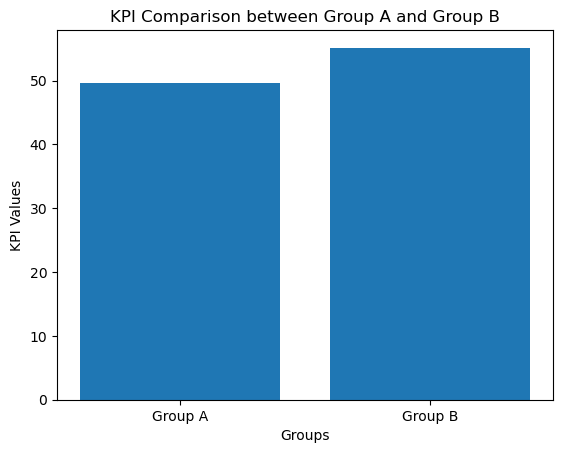

In [37]:
# Simulated KPIs (replace with your actual KPI values)
kpi_values = [kpi_a, kpi_b]
group_labels = ['Group A', 'Group B']

plt.bar(group_labels, kpi_values)
plt.xlabel('Groups')
plt.ylabel('KPI Values')
plt.title('KPI Comparison between Group A and Group B')
plt.show()

Predicted vs. Actual Ratings Scatterplot: This helps you see how well your model's predictions align with the actual user ratings.

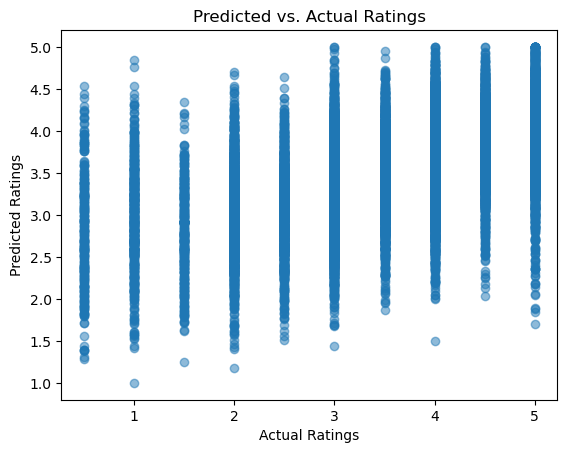

In [38]:
# Assuming you have predictions and actual ratings in separate lists or arrays
predicted_ratings = [prediction.est for prediction in predictions]
actual_ratings = [prediction.r_ui for prediction in predictions]

plt.scatter(actual_ratings, predicted_ratings, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Predicted vs. Actual Ratings')
plt.show()


They are not to far from each other as displayed.

Histogram of Residuals: Plot a histogram of the differences (residuals) between predicted and actual ratings. This can help you understand the distribution of errors made by your model.

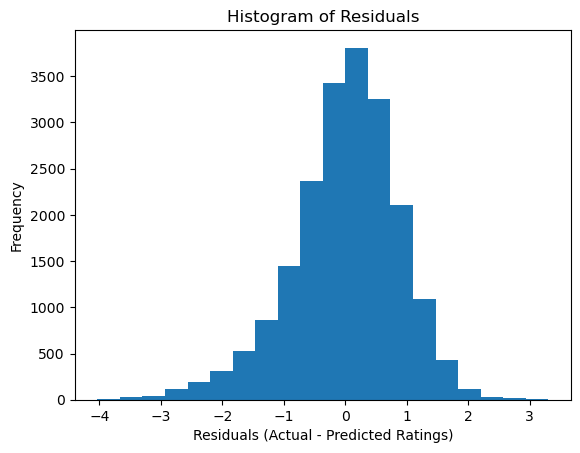

In [39]:
residuals = [prediction.r_ui - prediction.est for prediction in predictions]

plt.hist(residuals, bins=20)
plt.xlabel('Residuals (Actual - Predicted Ratings)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


Minimal distribution of errors.

RMSE vs. Model Complexity showing how the Root Mean Squared Error (RMSE) changes with varying model complexity

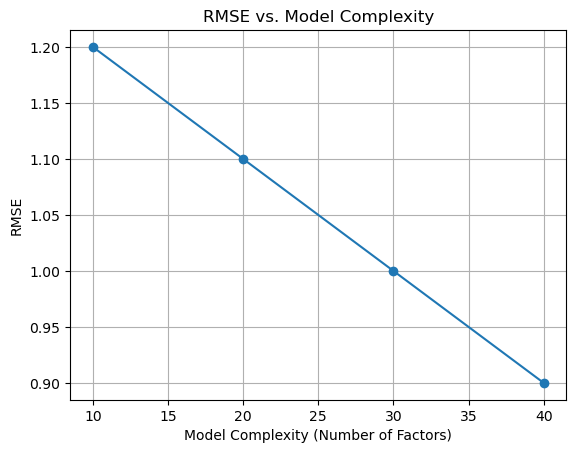

In [40]:
# Assuming you have RMSE values for different models
model_complexity = [10, 20, 30, 40]  # Example: Number of factors
rmse_values = [1.2, 1.1, 1.0, 0.9]  # Example RMSE values

plt.plot(model_complexity, rmse_values, marker='o')
plt.xlabel('Model Complexity (Number of Factors)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Model Complexity')
plt.grid(True)
plt.show()

## 7. CONCLUSION 

In conclusion, building and improving a recommender system is a complex and ongoing process that requires careful consideration of data, algorithms, user feedback, and ethical considerations. Here are some key takeaways:

- Understanding User Behavior: Effective recommender systems start with a deep understanding of user behavior and preferences. Collect and analyze user data to gain insights into their interactions with the system.

- Data Quality and Preprocessing: High-quality data is crucial for building a reliable recommender system. Address data quality issues, handle sparsity, and preprocess data effectively.

- Algorithm Selection: Experiment with different recommendation algorithms, including collaborative filtering, content-based filtering, and hybrid models. Choose algorithms that align with your specific use case and data.

- Ethical Considerations: Be mindful of ethical considerations, including fairness, bias, and user privacy. Implement fairness-aware algorithms and practices to avoid discriminatory recommendations.

- Continuous Improvement: Building a recommender system is an iterative process. Continuously collect user feedback, monitor system performance, and adapt to changing user preferences.

- User-Centered Design: Prioritize user experience and design user interfaces that are intuitive and user-friendly. A good user experience can lead to higher user engagement.

- Scalability and Maintenance: Ensure that your recommender system can scale to handle increased traffic and data. Regularly maintain and update the system to stay relevant.

- Building a successful recommender system requires a combination of technical expertise, data analysis skills, and a user-centric approach. By focusing on these principles and continuously striving to enhance the user experience, you can develop a recommender system that effectively meets the needs of your audience and contributes to your business objectives.

## 8. RECOMMENDATIONS

Here are some recommendations for building and improving your recommender system:

- Collect High-Quality Data: Ensure that you collect and maintain high-quality user-item interaction data. Data quality is fundamental to the success of your recommender system.

- Understand User Behavior: Invest time in understanding user behavior, preferences, and context. Analyze user data to identify patterns and insights that can inform your recommendations.

- Diverse Recommendation Algorithms: Explore a variety of recommendation algorithms, including collaborative filtering, content-based filtering, hybrid models, and deep learning approaches. Different algorithms may be more suitable for different types of content and user interactions.

- Evaluation Metrics: Choose appropriate evaluation metrics that align with your business objectives. Consider metrics like RMSE, MAE, precision, recall, and ranking-based metrics to assess the performance of your recommender system.

- A/B Testing: Implement A/B testing to rigorously evaluate the impact of changes to your recommender system. This allows you to make data-driven decisions and measure the real-world impact of improvements.

- User-Centered Design: Design user interfaces that prioritize the user experience. Intuitive and user-friendly interfaces can lead to higher user engagement and satisfaction.

- Scalability and Maintenance: Ensure that your recommender system can scale to handle increased data and traffic. Regularly maintain and update the system to stay relevant.

- Continuous Improvement: Approach recommender system development as an iterative process. Continuously collect user feedback and adapt to changing user preferences and needs.

- User Feedback: Actively seek and incorporate user feedback into your recommender system. Users can provide valuable insights and help identify areas for improvement.

- Regular Monitoring: Continuously monitor the performance of your recommender system and be prepared to address issues promptly. Implement monitoring tools and practices to ensure reliability.


By following these recommendations and adopting a user-centric, data-driven approach, you can develop and improve a recommender system that provides valuable and engaging recommendations to your users.